In [1]:
import pandas as pd
from matplotlib import pyplot as plt
import numpy as np
%matplotlib inline

C:\Users\abhinav.aggarwal\AppData\Local\Temp\ipykernel_19424\2544774444.py:1: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


In [2]:
df = pd.read_csv("customer_churn.csv")
df.sample(5)

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
3018,4176-RELJR,Male,1,No,No,67,Yes,Yes,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Credit card (automatic),25.10,1672.15,No
4388,3525-DVKFN,Female,0,No,No,17,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,19.40,358.05,No
5257,6029-WTIPC,Male,1,No,No,37,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,101.10,3744.05,Yes
2483,7641-EUYET,Male,1,Yes,Yes,46,Yes,Yes,Fiber optic,Yes,...,Yes,No,Yes,No,Month-to-month,Yes,Electronic check,100.70,4541.2,Yes
3249,4324-BZCKL,Female,0,Yes,Yes,10,Yes,No,DSL,No,...,Yes,No,No,No,Month-to-month,Yes,Mailed check,55.55,551.3,No


In [3]:
df.drop(columns='customerID', inplace=True)

In [4]:
df.dtypes

gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges         object
Churn                object
dtype: object

In [5]:
df['TotalCharges'] = df['TotalCharges'].str.strip()

In [6]:
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'])

In [7]:
df.isna().mean()*100

gender              0.000000
SeniorCitizen       0.000000
Partner             0.000000
Dependents          0.000000
tenure              0.000000
PhoneService        0.000000
MultipleLines       0.000000
InternetService     0.000000
OnlineSecurity      0.000000
OnlineBackup        0.000000
DeviceProtection    0.000000
TechSupport         0.000000
StreamingTV         0.000000
StreamingMovies     0.000000
Contract            0.000000
PaperlessBilling    0.000000
PaymentMethod       0.000000
MonthlyCharges      0.000000
TotalCharges        0.156183
Churn               0.000000
dtype: float64

In [8]:
from sklearn.impute import KNNImputer
imp = KNNImputer()
numDF = df.select_dtypes(include='number')
df.loc[:,numDF.columns] = imp.fit_transform(numDF)

In [9]:
df.sample(5)

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
511,Male,0,No,No,61,Yes,Yes,Fiber optic,Yes,No,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,106.45,6300.15,No
5531,Male,0,Yes,Yes,68,No,No phone service,DSL,Yes,Yes,No,No,Yes,No,One year,No,Mailed check,44.80,2983.65,No
2865,Female,0,Yes,Yes,66,Yes,Yes,Fiber optic,Yes,Yes,Yes,No,Yes,Yes,Two year,No,Bank transfer (automatic),109.25,7082.50,No
1833,Male,0,No,No,1,Yes,No,DSL,Yes,No,No,No,No,No,Month-to-month,No,Electronic check,47.95,47.95,No
1323,Female,0,Yes,No,71,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,Yes,Bank transfer (automatic),24.65,1710.15,No


In [10]:
objColums = df.select_dtypes(exclude=['number'])
objColums.drop(columns='Churn')
for col in objColums.columns:
    print(f"For column {col} ",df[col].unique(),"\n")

For column gender  ['Female' 'Male'] 

For column Partner  ['Yes' 'No'] 

For column Dependents  ['No' 'Yes'] 

For column PhoneService  ['No' 'Yes'] 

For column MultipleLines  ['No phone service' 'No' 'Yes'] 

For column InternetService  ['DSL' 'Fiber optic' 'No'] 

For column OnlineSecurity  ['No' 'Yes' 'No internet service'] 

For column OnlineBackup  ['Yes' 'No' 'No internet service'] 

For column DeviceProtection  ['No' 'Yes' 'No internet service'] 

For column TechSupport  ['No' 'Yes' 'No internet service'] 

For column StreamingTV  ['No' 'Yes' 'No internet service'] 

For column StreamingMovies  ['No' 'Yes' 'No internet service'] 

For column Contract  ['Month-to-month' 'One year' 'Two year'] 

For column PaperlessBilling  ['Yes' 'No'] 

For column PaymentMethod  ['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (automatic)'] 

For column Churn  ['No' 'Yes'] 



In [11]:
df['PaymentMethod'].unique()

array(['Electronic check', 'Mailed check', 'Bank transfer (automatic)',
       'Credit card (automatic)'], dtype=object)

In [12]:
df.replace('No internet service','No',inplace=True)
df.replace('No phone service','No',inplace=True)

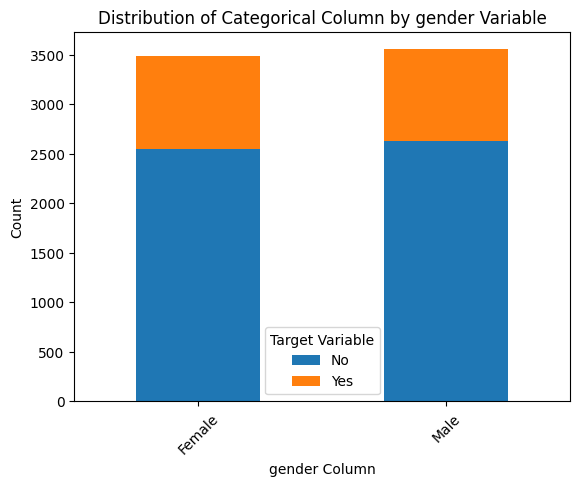

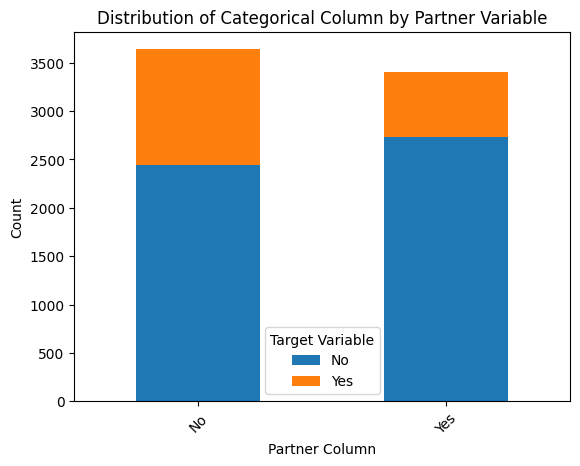

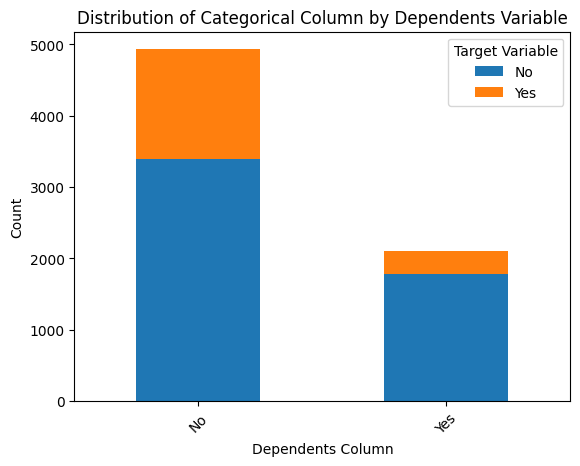

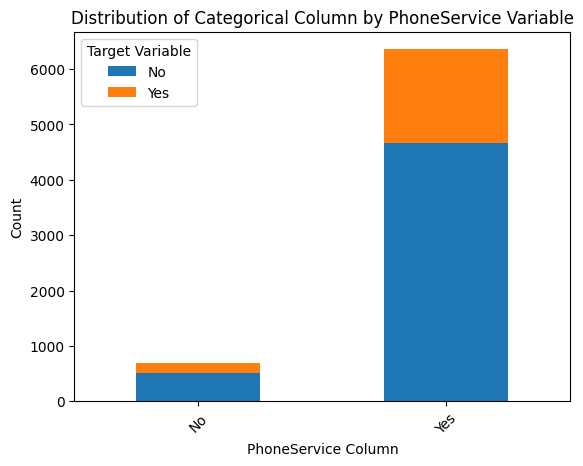

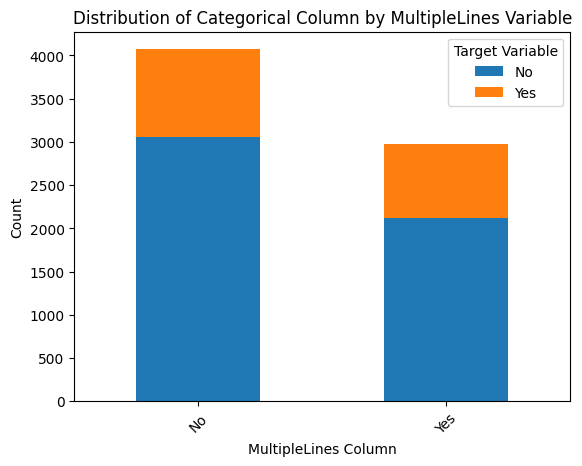

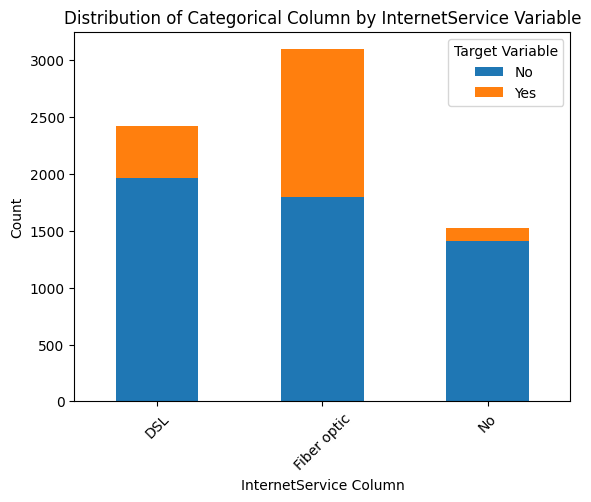

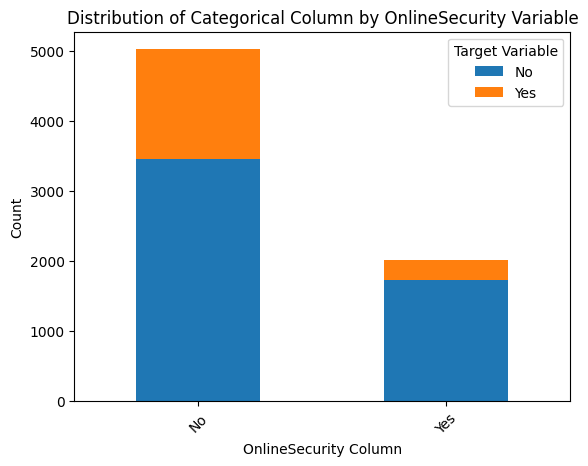

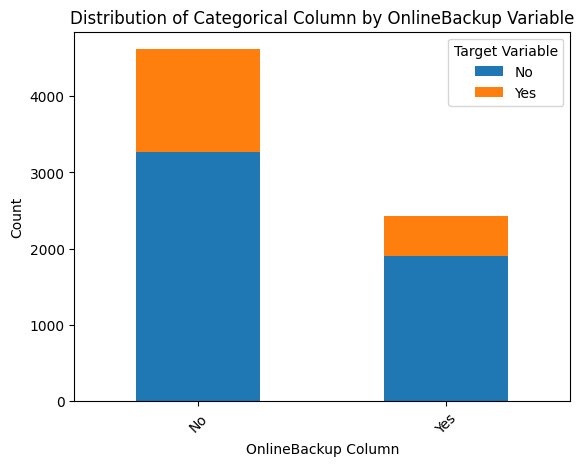

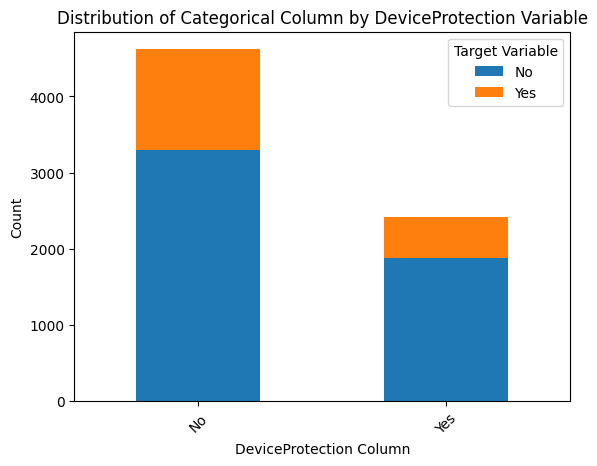

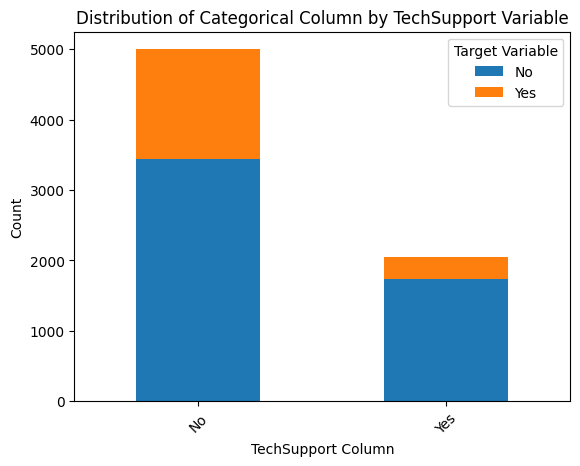

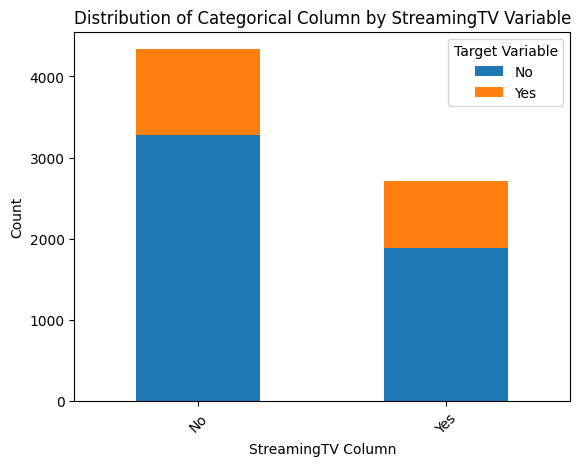

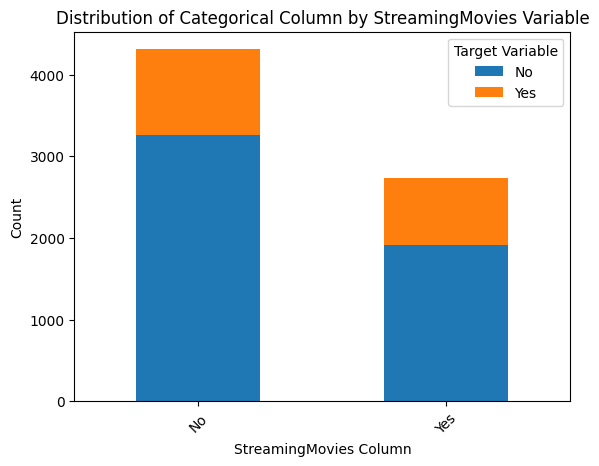

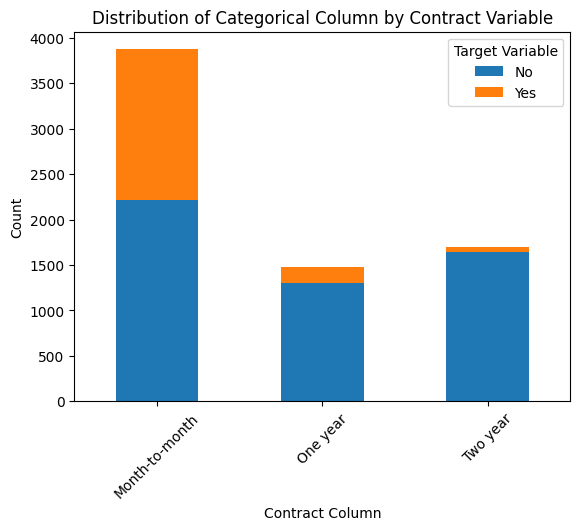

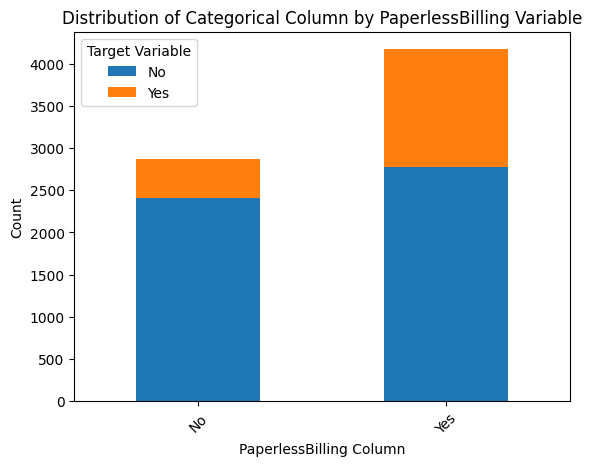

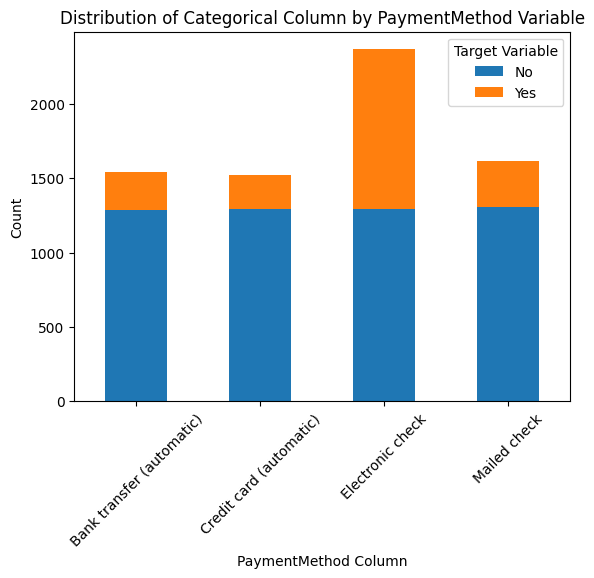

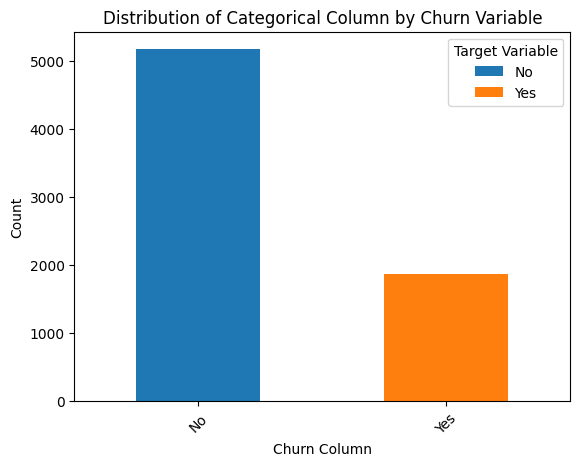

In [13]:
for col in objColums:
    grouped = df.groupby([col, 'Churn']).size().unstack()

    # Plot the grouped data
    grouped.plot(kind='bar', stacked=True)

    # Customize the plot
    plt.title('Distribution of Categorical Column by {} Variable'.format(col))
    plt.xlabel('{} Column'.format(col))
    plt.ylabel('Count')
    plt.xticks(rotation = 45)  # Rotate x-axis labels if needed
    plt.legend(title='Target Variable')

    # Show the plot
    plt.show()


In [14]:
from sklearn.preprocessing import OneHotEncoder
ohe = OneHotEncoder(drop='first')

In [15]:
objColums

,gender,Partner,Dependents,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,Churn
0,Female,Yes,No,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,No
1,Male,No,No,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,No
2,Male,No,No,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,Yes
3,Male,No,No,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),No
4,Female,No,No,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,Male,Yes,Yes,Yes,Yes,DSL,Yes,No,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,No
7039,Female,Yes,Yes,Yes,Yes,Fiber optic,No,Yes,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),No
7040,Female,Yes,Yes,No,No phone service,DSL,Yes,No,No,No,No,No,Month-to-month,Yes,Electronic check,No
7041,Male,Yes,No,Yes,Yes,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Mailed check,Yes


In [16]:
X_new = ohe.fit_transform(objColums).toarray()
newMat = pd.DataFrame(X_new,columns=ohe.get_feature_names_out(objColums.columns))
newMat

,gender_Male,Partner_Yes,Dependents_Yes,PhoneService_Yes,MultipleLines_No phone service,MultipleLines_Yes,InternetService_Fiber optic,InternetService_No,OnlineSecurity_No internet service,OnlineSecurity_Yes,...,StreamingTV_Yes,StreamingMovies_No internet service,StreamingMovies_Yes,Contract_One year,Contract_Two year,PaperlessBilling_Yes,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,Churn_Yes
0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0
1,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
2,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0
3,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,1.0,1.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,...,1.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0
7039,0.0,1.0,1.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,...,1.0,0.0,1.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0
7040,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0
7041,1.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0


In [17]:
order = {'No': 0, 'Yes': 1}
df['Churn'] = df['Churn'].map(order)

In [18]:
df.drop(columns=objColums.columns,inplace=True)
df = pd.concat([df,newMat],axis=1)

In [19]:
from sklearn.preprocessing import MinMaxScaler
ms = MinMaxScaler()
df.loc[:,:] = ms.fit_transform(df)

C:\Users\abhinav.aggarwal\AppData\Local\Temp\ipykernel_19424\2238602962.py:3: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '[0.01388889 0.47222222 0.02777778 ... 0.15277778 0.05555556 0.91666667]' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  df.loc[:,:] = ms.fit_transform(df)


In [20]:
df

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges,gender_Male,Partner_Yes,Dependents_Yes,PhoneService_Yes,MultipleLines_No phone service,MultipleLines_Yes,...,StreamingTV_Yes,StreamingMovies_No internet service,StreamingMovies_Yes,Contract_One year,Contract_Two year,PaperlessBilling_Yes,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,Churn_Yes
0,0,0.013889,0.115423,0.001275,0.0,1.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0
1,0,0.472222,0.385075,0.215867,1.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
2,0,0.027778,0.354229,0.010310,1.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0
3,0,0.625000,0.239303,0.210241,1.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0,0.027778,0.521891,0.015330,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,0,0.333333,0.662189,0.227521,1.0,1.0,1.0,1.0,0.0,1.0,...,1.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0
7039,0,1.000000,0.845274,0.847461,0.0,1.0,1.0,1.0,0.0,1.0,...,1.0,0.0,1.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0
7040,0,0.152778,0.112935,0.037809,0.0,1.0,1.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0
7041,1,0.055556,0.558706,0.033210,1.0,1.0,0.0,1.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0


In [21]:
x = df.drop('Churn_Yes',axis=1)
y = df['Churn_Yes']

from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.2,random_state=5)

In [22]:
import tensorflow as tf
from tensorflow import keras

In [23]:
shap = len(x_train.columns)
shap

30

In [24]:
model = keras.Sequential([
    keras.layers.Dense(30, input_shape=(30,), activation='relu'),
    keras.layers.Dense(20, activation='relu'),
    keras.layers.Dense(1, activation='sigmoid')
])

# opt = keras.optimizers.Adam(learning_rate=0.01)

model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

model.fit(x_train, y_train, epochs=100)



Epoch 1/100


177/177 [==============================] - 1s 2ms/step - loss: 0.4946 - accuracy: 0.7494
Epoch 2/100
177/177 [==============================] - 0s 2ms/step - loss: 0.4328 - accuracy: 0.7932
Epoch 3/100
177/177 [==============================] - 0s 1ms/step - loss: 0.4236 - accuracy: 0.8010
Epoch 4/100
177/177 [==============================] - 0s 1ms/step - loss: 0.4217 - accuracy: 0.8019
Epoch 5/100
177/177 [==============================] - 0s 1ms/step - loss: 0.4175 - accuracy: 0.8039
Epoch 6/100
177/177 [==============================] - 0s 1ms/step - loss: 0.4161 - accuracy: 0.8064
Epoch 7/100
177/177 [==============================] - 0s 1ms/step - loss: 0.4142 - accuracy: 0.8042
Epoch 8/100
177/177 [==============================] - 0s 2ms/step - loss: 0.4123 - accuracy: 0.8064
Epoch 9/100
177/177 [==============================] - 0s 2ms/step - loss: 0.4115 - accuracy: 0.8076
Epoch 10/100
177/177 [==============================] - 0s 1ms/step - loss: 0.4107 - ac

In [25]:
model.evaluate(x_test, y_test)

45/45 [==============================] - 0s 1ms/step - loss: 0.5020 - accuracy: 0.7814


[0.501964807510376, 0.7814052700996399]

In [26]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()
lr.fit(x_train,y_train)
lrPredicted = lr.predict(x_test)

In [27]:
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report,precision_score,f1_score
cm1 = confusion_matrix(y_test, lrPredicted)
print("The confusion matrix for logistic regression is: \n",cm1)
print("The accuracy of logistic regression is ",accuracy_score(y_test, lrPredicted)*100,"%")

The confusion matrix for logistic regression is: 
 [[914 109]
 [182 204]]
The accuracy of logistic regression is  79.347054648687 %


In [28]:
from sklearn.ensemble import RandomForestClassifier
classifierRF = RandomForestClassifier(n_estimators = 10, criterion = 'entropy', random_state = 0, max_depth=8, min_samples_split=5)
classifierRF.fit(x_train, y_train)
RFpredict = classifierRF.predict(x_test)

In [29]:
cm2 = confusion_matrix(y_test, RFpredict)
print("The confusion matrix for random forest  is: \n",cm1)
print("The accuracy of RF is ",accuracy_score(y_test, RFpredict)*100,"%")

The confusion matrix for random forest  is: 
 [[914 109]
 [182 204]]
The accuracy of RF is  79.4889992902768 %


In [30]:
import xgboost
from xgboost import XGBClassifier
xgb = XGBClassifier()
xgb.fit(x_train,y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)

In [31]:
xgPred = xgb.predict(x_test)
cm3 = confusion_matrix(y_test, xgPred)
print("The confusion matrix for xgb is: \n",cm3)
print("The accuracy of xgb is ",accuracy_score(y_test, xgPred)*100,"%")

The confusion matrix for xgb is: 
 [[913 110]
 [195 191]]
The accuracy of xgb is  78.35344215755855 %
